**Introdução à Inteligencia Artificial**

Atividade 2

Alunos: Márcio Alexandre Silva Monteiro, Carlos Magno, Gregory


**Questão 01**


In [202]:
# libs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import pi
from geneticalgorithm import geneticalgorithm as ga
from random import uniform
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import figure
from numpy import cos, sin, e, exp, sqrt, prod
import pyswarms as ps
from pyswarms.utils.plotters import plot_surface
from pyswarms.utils.plotters.formatters import Mesher
from pyswarms.utils.functions import single_obj as fx


tol = 0.000001  # tolerancia para convergencia (global)
# define dark background pros graficos
plt.style.use('dark_background')
sns.color_palette()[3]
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind': float_formatter})


Para o cálculo de x, consideremos o algoritmo:


In [203]:
# Calcula o gradiente
# f: função a ser calculada
# f_grad: primeira derivada da função f
# init: valor inicial para função
# alpha: valor de alpha
# tol: tolerância para iteração
# max_iter: max de iterações possíveis
def calculate_grad(f, f_grad, init, alpha=1, tol=1e-5, max_iter=10000):
    xk = init
    y = f(xk)
    gfk = f_grad(xk)
    gfk_norm = np.linalg.norm(gfk)
    y_points = [y]
    x_points = [xk]
    num_iter = 0
    print('alpha={:.4f}'.format(alpha))
    print('Condição inicial f={:.4f} / {}'.format(y, xk))
    while gfk_norm > tol and num_iter < max_iter:
        xk = xk - alpha * gfk
        gfk = f_grad(xk)
        gfk_norm = np.linalg.norm(gfk)
        num_iter += 1
        x_points.append(xk)
        y_points.append(y)
        y = f(xk)
    if num_iter == max_iter:
        print('\nGradient descent não converge.')
    else:
        print('Condição final f={:.4f} / {}'.format(y, xk))
        print('Total de iterações: {}'.format(num_iter))

    return num_iter, xk, y, [np.array(x_points), np.array(y_points)]


Para o cálculo do gradiente, define-se primeiramente a função e o gradiente dela em seguida


In [204]:
# Para a primeira função (R2 e R3)
def xk_q01(x): return np.dot(x, x)
def xk_q01_grad(x): return 2*x

# Para a segunda funcao (Ackley em R2)
def xk2_q01(val):
    x = val[0]
    y = val[1]
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20


def xk2_q01_grad(val):
    x = val[0]
    y = val[1]
    xn = (2.828 * x / (sqrt(x ** 2 + y ** 2))) * exp(-0.2 * sqrt(0.5 * (x ** 2 + y ** 2))) + pi * exp(
        0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) * sin(2 * pi * x)

    return xn


Para plotagem dos gráficos


In [205]:
def plot(xs, ys):
    plt.plot(ys, linestyle='--', marker='o')
    plt.plot(len(ys)-1, ys[-1], 'ro')
    plt.xlabel("Iterations")
    plt.ylabel("Objective Function Value")
    plt.title("Objective Function Value During Optimization Process")
    plt.figure(figsize=(12, 8))
    plt.tight_layout()
    plt.show()


Para o $\sum{x_{i}^2}$ em ${\rm I\!R^2}$, tem-se:


alpha=0.0364
Condição inicial f=402.0692 / [-9.4070 17.7081]
Condição final f=0.0000 / [-0.0000 0.0000]
Total de iterações: 202


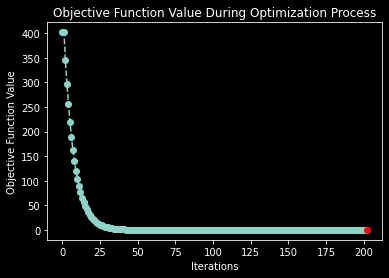

<Figure size 864x576 with 0 Axes>

alpha=0.0307
Condição inicial f=972.0663 / [27.0750 15.4599]
Condição final f=0.0000 / [0.0000 0.0000]
Total de iterações: 247


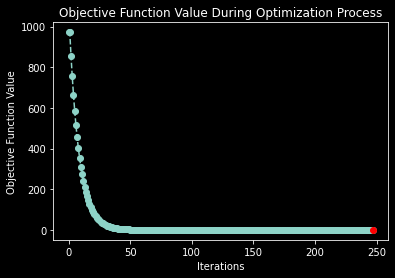

<Figure size 864x576 with 0 Axes>

alpha=0.0177
Condição inicial f=21.0858 / [4.5917 -0.0498]
Condição final f=0.0000 / [0.0000 -0.0000]
Total de iterações: 381


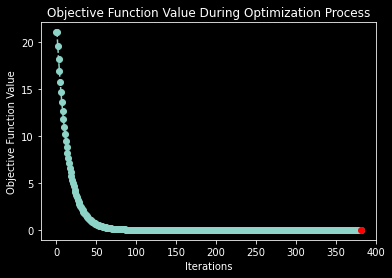

<Figure size 864x576 with 0 Axes>

alpha=0.0078
Condição inicial f=559.3800 / [-16.4094 -17.0327]
Condição final f=0.0000 / [-0.0000 -0.0000]
Total de iterações: 975


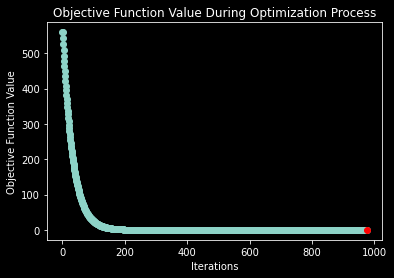

<Figure size 864x576 with 0 Axes>

alpha=0.0276
Condição inicial f=786.6220 / [26.4324 9.3781]
Condição final f=0.0000 / [0.0000 0.0000]
Total de iterações: 274


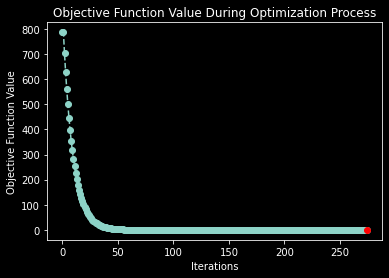

<Figure size 864x576 with 0 Axes>

alpha=0.0257
Condição inicial f=1284.0516 / [27.4986 -22.9756]
Condição final f=0.0000 / [0.0000 -0.0000]
Total de iterações: 300


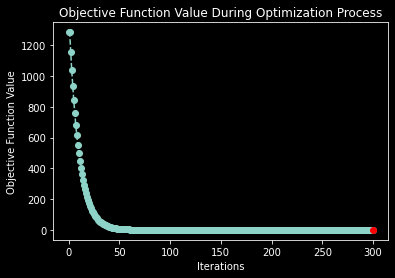

<Figure size 864x576 with 0 Axes>

alpha=0.0304
Condição inicial f=133.9171 / [-9.8152 6.1302]
Condição final f=0.0000 / [-0.0000 0.0000]
Total de iterações: 234


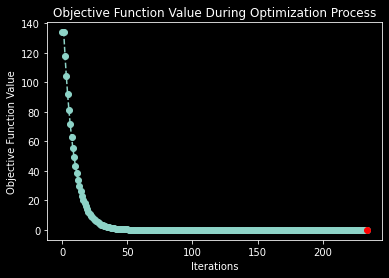

<Figure size 864x576 with 0 Axes>

alpha=0.0282
Condição inicial f=1026.6232 / [-23.5266 -21.7514]
Condição final f=0.0000 / [-0.0000 -0.0000]
Total de iterações: 270


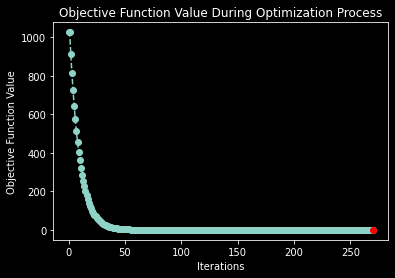

<Figure size 864x576 with 0 Axes>

alpha=0.0108
Condição inicial f=1112.6385 / [23.3663 -23.8045]
Condição final f=0.0000 / [0.0000 -0.0000]
Total de iterações: 717


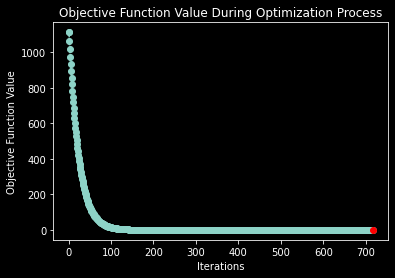

<Figure size 864x576 with 0 Axes>

alpha=0.0163
Condição inicial f=114.6643 / [-9.6805 -4.5773]
Condição final f=0.0000 / [-0.0000 -0.0000]
Total de iterações: 440


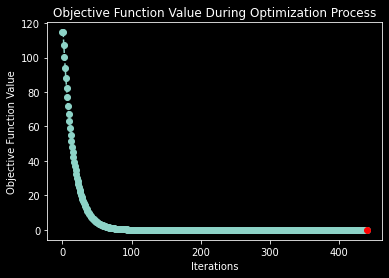

<Figure size 864x576 with 0 Axes>

alpha=0.0074
Condição inicial f=867.1407 / [23.8339 -17.2942]
Condição final f=0.0000 / [0.0000 -0.0000]
Total de iterações: 1046


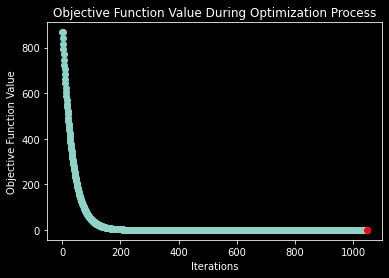

<Figure size 864x576 with 0 Axes>

alpha=0.0060
Condição inicial f=1381.4808 / [-27.7529 24.7236]
Condição final f=0.0000 / [-0.0000 0.0000]
Total de iterações: 1322


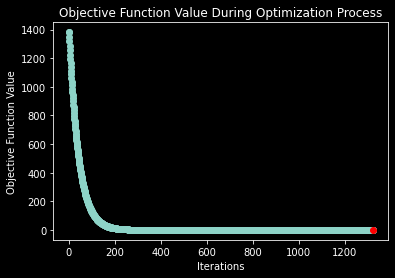

<Figure size 864x576 with 0 Axes>

alpha=0.0371
Condição inicial f=86.8698 / [-9.0468 -2.2418]
Condição final f=0.0000 / [-0.0000 -0.0000]
Total de iterações: 188


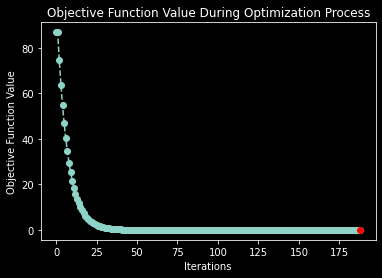

<Figure size 864x576 with 0 Axes>

alpha=0.0295
Condição inicial f=736.3311 / [-13.8877 -23.3123]
Condição final f=0.0000 / [-0.0000 -0.0000]
Total de iterações: 255


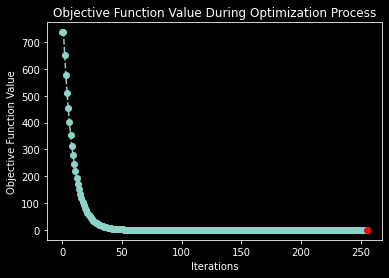

<Figure size 864x576 with 0 Axes>

alpha=0.0325
Condição inicial f=1078.4410 / [28.6057 -16.1293]
Condição final f=0.0000 / [0.0000 -0.0000]
Total de iterações: 234


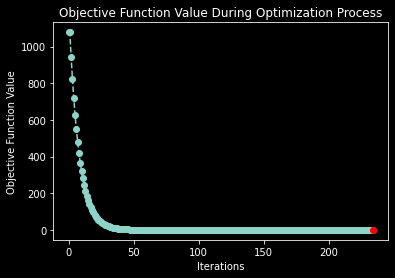

<Figure size 864x576 with 0 Axes>

alpha=0.0280
Condição inicial f=962.8483 / [27.4536 14.4619]
Condição final f=0.0000 / [0.0000 0.0000]
Total de iterações: 272


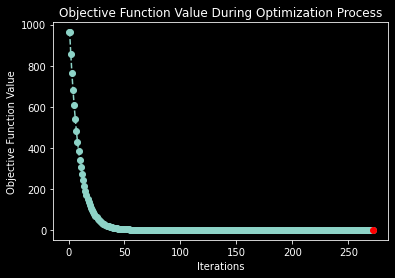

<Figure size 864x576 with 0 Axes>

alpha=0.0378
Condição inicial f=1646.7735 / [29.3314 -28.0436]
Condição final f=0.0000 / [0.0000 -0.0000]
Total de iterações: 203


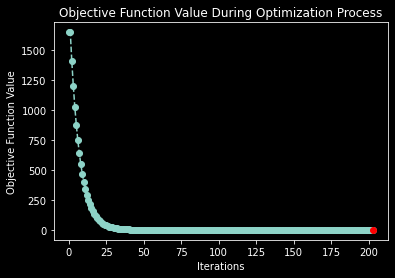

<Figure size 864x576 with 0 Axes>

alpha=0.0220
Condição inicial f=854.8654 / [10.4365 27.3120]
Condição final f=0.0000 / [0.0000 0.0000]
Total de iterações: 346


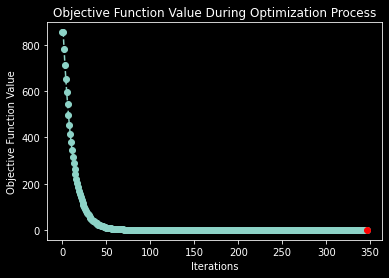

<Figure size 864x576 with 0 Axes>

alpha=0.0204
Condição inicial f=285.6815 / [-12.3476 11.5421]
Condição final f=0.0000 / [-0.0000 0.0000]
Total de iterações: 361


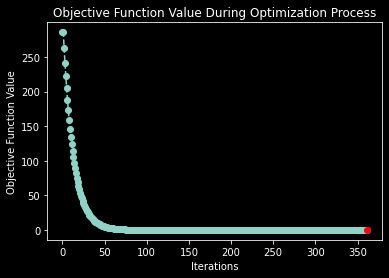

<Figure size 864x576 with 0 Axes>

alpha=0.0092
Condição inicial f=939.3803 / [-6.6953 -29.9091]
Condição final f=0.0000 / [-0.0000 -0.0000]
Total de iterações: 843


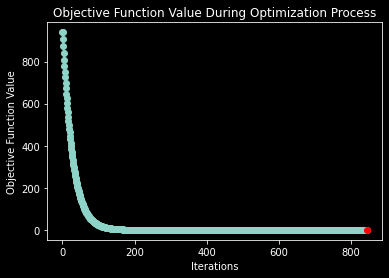

<Figure size 864x576 with 0 Axes>

In [206]:
A = -30
B = 30
for n in range(20):
    x0 = np.array([uniform(A, B), uniform(A, B)])
    alpha = uniform(0.001, 0.04)
    i, x, y, [X, Y] = calculate_grad(xk_q01, xk_q01_grad, x0, alpha)
    plot(X, Y)


Para o $\sum{x_{i}^2}$ em ${\rm I\!R^3}$, tem-se:


alpha=0.0351
Condição inicial f=752.9359 / [-7.0690 4.9546 -26.0464]
Condição final f=0.0000 / [-0.0000 0.0000 -0.0000]
Total de iterações: 213


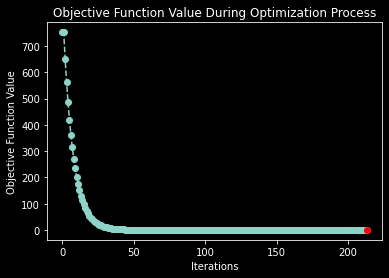

<Figure size 864x576 with 0 Axes>

alpha=0.0095
Condição inicial f=1177.7992 / [28.9529 6.3791 -17.2869]
Condição final f=0.0000 / [0.0000 0.0000 -0.0000]
Total de iterações: 825


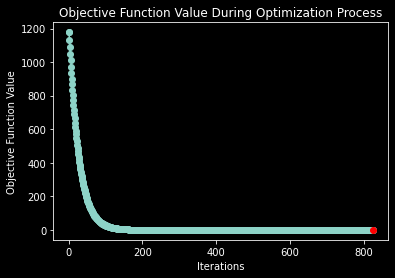

<Figure size 864x576 with 0 Axes>

alpha=0.0265
Condição inicial f=27.3557 / [1.2439 -4.0477 3.0699]
Condição final f=0.0000 / [0.0000 -0.0000 0.0000]
Total de iterações: 255


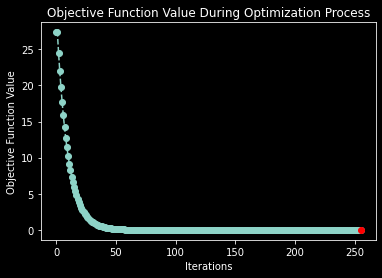

<Figure size 864x576 with 0 Axes>

alpha=0.0154
Condição inicial f=234.7720 / [9.9718 5.6475 10.1707]
Condição final f=0.0000 / [0.0000 0.0000 0.0000]
Total de iterações: 477


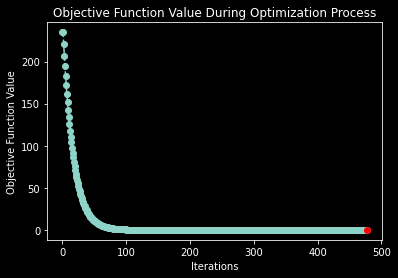

<Figure size 864x576 with 0 Axes>

alpha=0.0072
Condição inicial f=731.2722 / [-13.6686 13.9566 18.6991]
Condição final f=0.0000 / [-0.0000 0.0000 0.0000]
Total de iterações: 1064


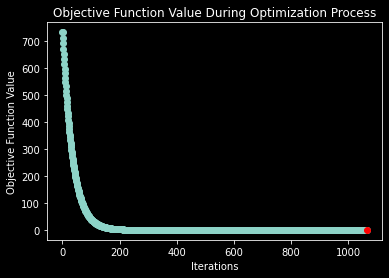

<Figure size 864x576 with 0 Axes>

alpha=0.0247
Condição inicial f=1308.5968 / [-25.1543 -3.9499 -25.6955]
Condição final f=0.0000 / [-0.0000 -0.0000 -0.0000]
Total de iterações: 313


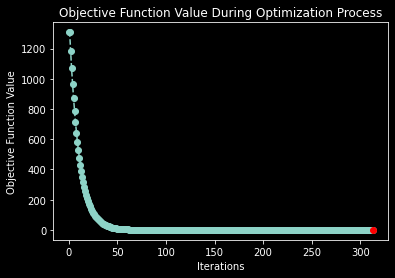

<Figure size 864x576 with 0 Axes>

alpha=0.0169
Condição inicial f=1264.4188 / [-11.0007 -21.4299 -26.1565]
Condição final f=0.0000 / [-0.0000 -0.0000 -0.0000]
Total de iterações: 459


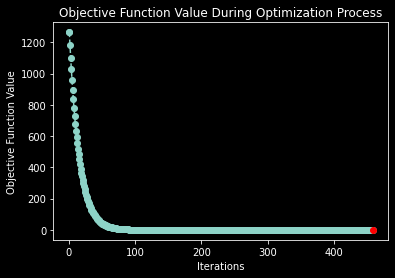

<Figure size 864x576 with 0 Axes>

alpha=0.0172
Condição inicial f=456.6557 / [-19.8107 -0.5664 -7.9919]
Condição final f=0.0000 / [-0.0000 -0.0000 -0.0000]
Total de iterações: 437


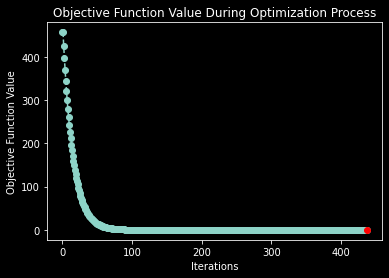

<Figure size 864x576 with 0 Axes>

alpha=0.0315
Condição inicial f=649.7315 / [8.7898 11.3058 -21.0867]
Condição final f=0.0000 / [0.0000 0.0000 -0.0000]
Total de iterações: 238


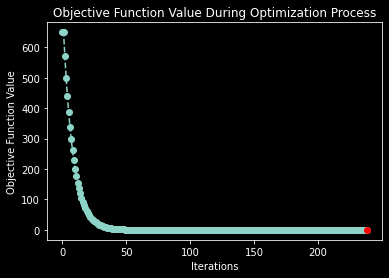

<Figure size 864x576 with 0 Axes>

alpha=0.0249
Condição inicial f=1060.2330 / [14.8921 27.5074 9.0442]
Condição final f=0.0000 / [0.0000 0.0000 0.0000]
Total de iterações: 307


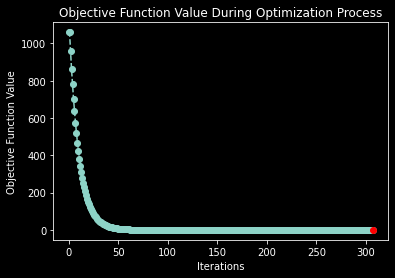

<Figure size 864x576 with 0 Axes>

alpha=0.0140
Condição inicial f=1740.2013 / [28.1953 20.0648 23.2944]
Condição final f=0.0000 / [0.0000 0.0000 0.0000]
Total de iterações: 562


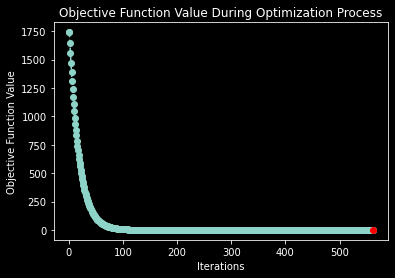

<Figure size 864x576 with 0 Axes>

alpha=0.0129
Condição inicial f=838.9217 / [7.0024 21.6236 -17.9530]
Condição final f=0.0000 / [0.0000 0.0000 -0.0000]
Total de iterações: 597


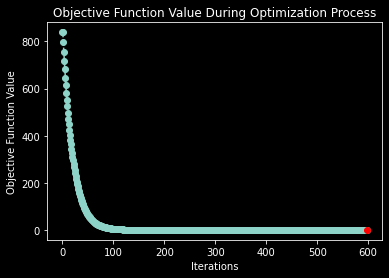

<Figure size 864x576 with 0 Axes>

alpha=0.0294
Condição inicial f=610.7389 / [-18.5806 16.1429 2.2148]
Condição final f=0.0000 / [-0.0000 0.0000 0.0000]
Total de iterações: 254


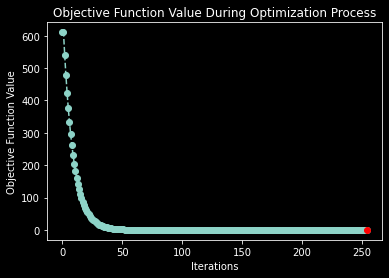

<Figure size 864x576 with 0 Axes>

alpha=0.0383
Condição inicial f=229.4551 / [-3.0825 0.0740 -14.8306]
Condição final f=0.0000 / [-0.0000 0.0000 -0.0000]
Total de iterações: 188


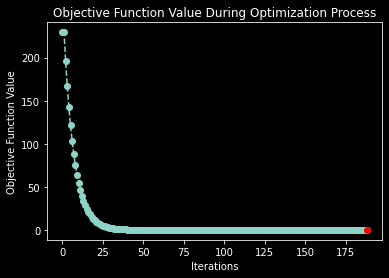

<Figure size 864x576 with 0 Axes>

alpha=0.0291
Condição inicial f=704.5246 / [26.3656 2.4117 1.8877]
Condição final f=0.0000 / [0.0000 0.0000 0.0000]
Total de iterações: 259


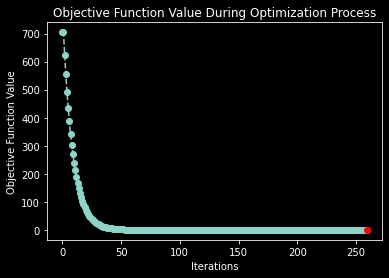

<Figure size 864x576 with 0 Axes>

alpha=0.0216
Condição inicial f=563.9590 / [20.2756 -11.6908 4.0231]
Condição final f=0.0000 / [0.0000 -0.0000 0.0000]
Total de iterações: 349


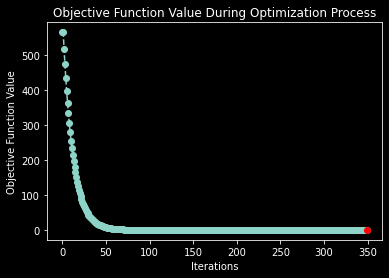

<Figure size 864x576 with 0 Axes>

alpha=0.0374
Condição inicial f=217.7361 / [-6.0421 5.7262 12.1836]
Condição final f=0.0000 / [-0.0000 0.0000 0.0000]
Total de iterações: 192


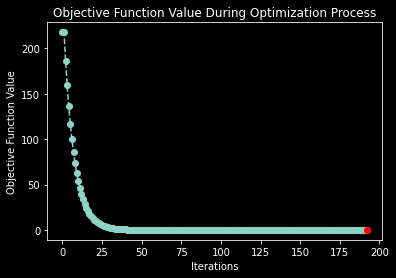

<Figure size 864x576 with 0 Axes>

alpha=0.0271
Condição inicial f=1438.6321 / [23.2780 -29.4394 5.4855]
Condição final f=0.0000 / [0.0000 -0.0000 0.0000]
Total de iterações: 285


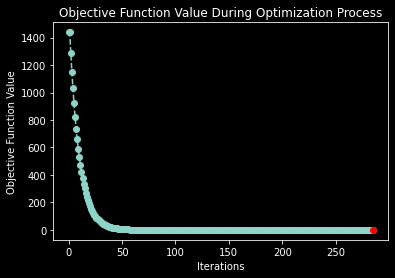

<Figure size 864x576 with 0 Axes>

alpha=0.0156
Condição inicial f=2260.5128 / [-26.0577 27.4789 28.7475]
Condição final f=0.0000 / [-0.0000 0.0000 0.0000]
Total de iterações: 509


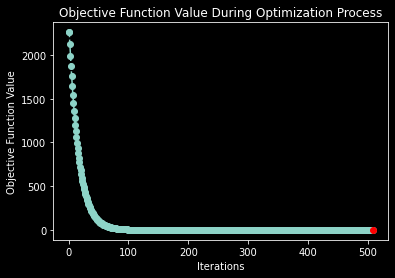

<Figure size 864x576 with 0 Axes>

alpha=0.0354
Condição inicial f=424.0912 / [-11.9545 2.1688 -16.6276]
Condição final f=0.0000 / [-0.0000 0.0000 -0.0000]
Total de iterações: 208


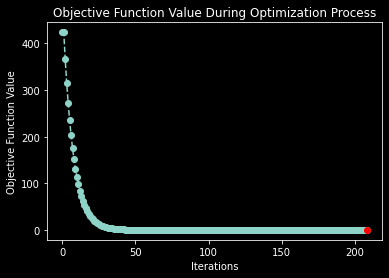

<Figure size 864x576 with 0 Axes>

In [207]:
for n in range(20):
    x0 = np.array([uniform(A, B), uniform(A, B), uniform(A, B)])
    alpha = uniform(0.001, 0.04)
    i, x, y, [X, Y] = calculate_grad(xk_q01, xk_q01_grad, x0, alpha)
    plot(X, Y)


Para a função de Ackley, calcula-se em ${\rm I\!R^2}$ e encontra-se vários mínimos locais

alpha=0.0355
Condição inicial f=20.8502 / [14.1881 14.5138]
Condição final f=20.2128 / [13.9956 14.3213]
Total de iterações: 7


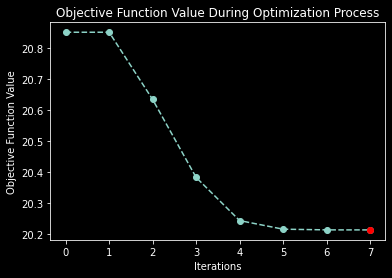

<Figure size 864x576 with 0 Axes>

alpha=0.0069
Condição inicial f=20.8620 / [-11.6447 -19.8933]
Condição final f=20.3370 / [-11.9984 -20.2470]
Total de iterações: 58


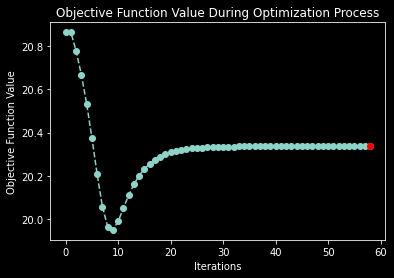

<Figure size 864x576 with 0 Axes>

alpha=0.0062
Condição inicial f=21.5741 / [22.8817 21.4407]
Condição final f=21.4534 / [22.9988 21.5579]
Total de iterações: 94


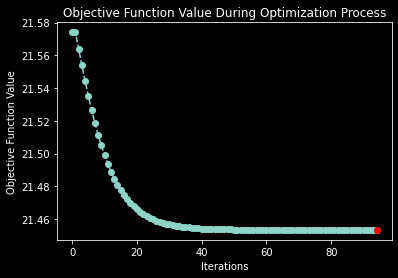

<Figure size 864x576 with 0 Axes>

alpha=0.0118
Condição inicial f=16.5184 / [0.0641 11.1596]
Condição final f=16.0627 / [0.0000 11.0955]
Total de iterações: 15


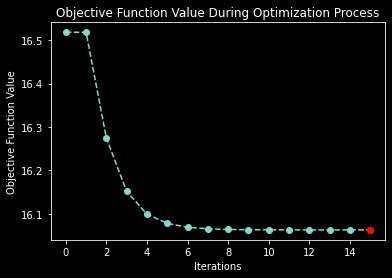

<Figure size 864x576 with 0 Axes>

alpha=0.0223
Condição inicial f=20.7036 / [-16.2139 11.3677]
Condição final f=20.4165 / [-15.9934 11.5882]
Total de iterações: 22


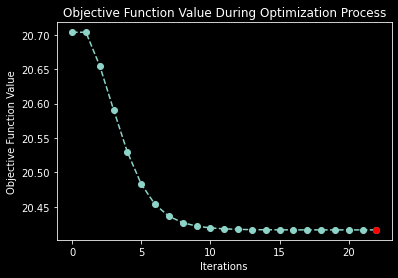

<Figure size 864x576 with 0 Axes>

alpha=0.0313
Condição inicial f=21.5269 / [25.3793 -21.8871]
Condição final f=20.9795 / [24.9994 -22.2670]
Total de iterações: 6


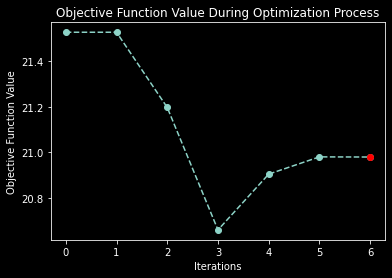

<Figure size 864x576 with 0 Axes>

alpha=0.0305
Condição inicial f=20.4501 / [-10.7299 -14.6700]
Condição final f=18.6498 / [-10.9976 -14.9377]
Total de iterações: 22


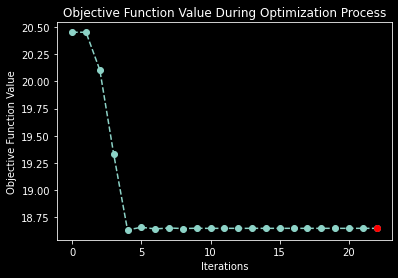

<Figure size 864x576 with 0 Axes>

alpha=0.0182
Condição inicial f=19.5656 / [11.9110 -11.6882]
Condição final f=19.7142 / [11.9913 -11.6079]
Total de iterações: 23


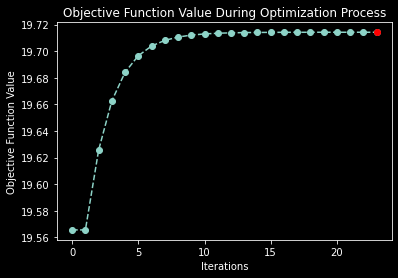

<Figure size 864x576 with 0 Axes>

alpha=0.0011
Condição inicial f=21.8681 / [27.6962 15.3553]
Condição final f=21.2496 / [27.9989 15.6580]
Total de iterações: 555


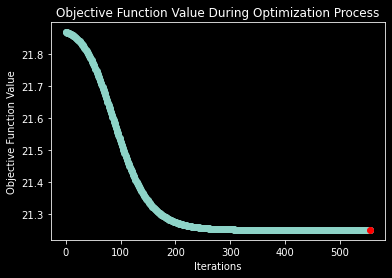

<Figure size 864x576 with 0 Axes>

alpha=0.0132
Condição inicial f=21.3142 / [-21.6809 -22.1251]
Condição final f=21.4513 / [-21.9989 -22.4431]
Total de iterações: 44


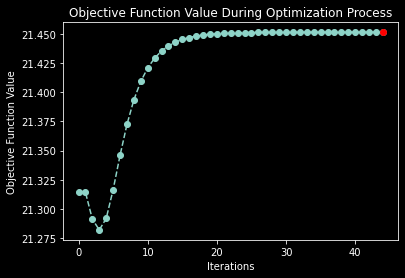

<Figure size 864x576 with 0 Axes>

alpha=0.0024
Condição inicial f=20.8566 / [2.1983 21.6784]
Condição final f=20.7677 / [1.9994 21.4795]
Total de iterações: 273


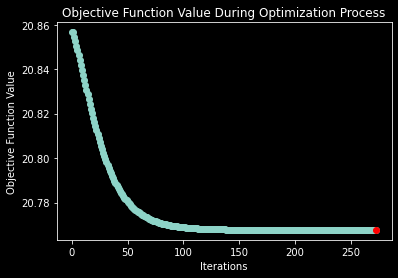

<Figure size 864x576 with 0 Axes>

alpha=0.0388
Condição inicial f=16.6442 / [6.6748 -7.1530]
Condição final f=15.5501 / [6.9880 -6.8398]
Total de iterações: 34


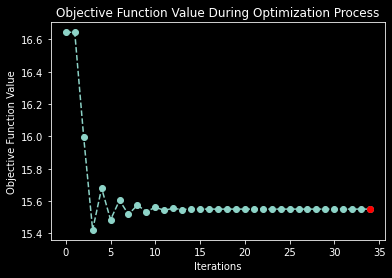

<Figure size 864x576 with 0 Axes>

alpha=0.0096
Condição inicial f=19.4793 / [-2.0991 19.1661]
Condição final f=19.8570 / [-1.9994 19.2658]
Total de iterações: 36


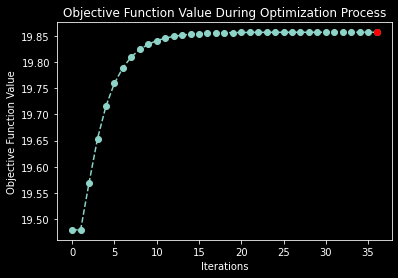

<Figure size 864x576 with 0 Axes>

alpha=0.0256
Condição inicial f=19.1742 / [9.9299 -10.5281]
Condição final f=19.1274 / [9.9873 -10.4707]
Total de iterações: 17


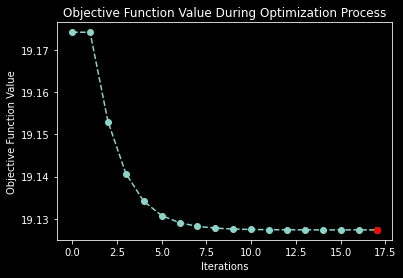

<Figure size 864x576 with 0 Axes>

alpha=0.0053
Condição inicial f=14.1102 / [3.8163 -5.6899]
Condição final f=14.0829 / [3.9681 -5.5381]
Total de iterações: 116


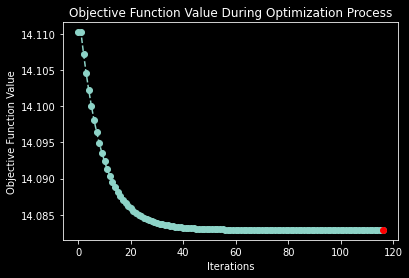

<Figure size 864x576 with 0 Axes>

alpha=0.0300
Condição inicial f=18.7349 / [-7.0343 -18.0094]
Condição final f=18.7111 / [-6.9987 -17.9738]
Total de iterações: 24


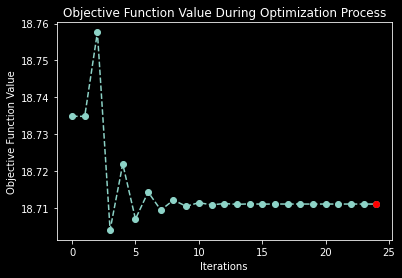

<Figure size 864x576 with 0 Axes>

alpha=0.0248
Condição inicial f=21.4721 / [11.6320 -20.3588]
Condição final f=19.2623 / [11.9990 -19.9917]
Total de iterações: 16


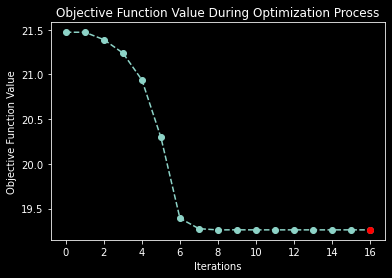

<Figure size 864x576 with 0 Axes>

alpha=0.0221
Condição inicial f=21.7795 / [-8.2283 -29.5670]
Condição final f=21.1801 / [-7.9996 -29.3383]
Total de iterações: 20


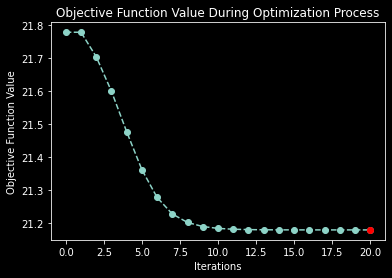

<Figure size 864x576 with 0 Axes>

alpha=0.0337
Condição inicial f=21.0078 / [-21.5531 3.8358]
Condição final f=20.7472 / [-21.9945 3.3943]
Total de iterações: 17


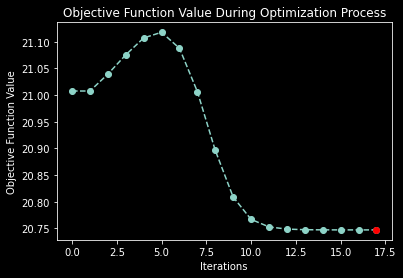

<Figure size 864x576 with 0 Axes>

alpha=0.0388
Condição inicial f=19.0379 / [14.0029 9.7951]
Condição final f=19.0841 / [13.9943 9.7865]
Total de iterações: 11


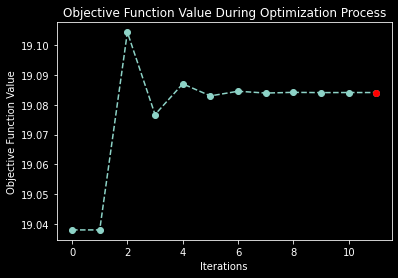

<Figure size 864x576 with 0 Axes>

In [208]:
for n in range(20):
    x0 = np.array([uniform(A, B), uniform(A, B)])
    alpha = uniform(0.001, 0.04)
    i, x, y, [X, Y] = calculate_grad(xk2_q01, xk2_q01_grad, x0, alpha, 1e-5, 50000)
    plot(X, Y)


**Questão 02**

Para a função esférica com Algorítmo genético

 The best solution found:                                                                           
 [0.0289 -0.0058 -0.0910]

 Objective function:
 0.009143259511653762


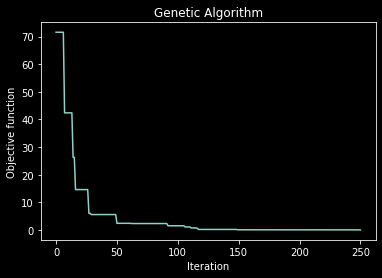

 The best solution found:                                                                           
 [0.0670 0.0327 0.0228]

 Objective function:
 0.006085322375001206


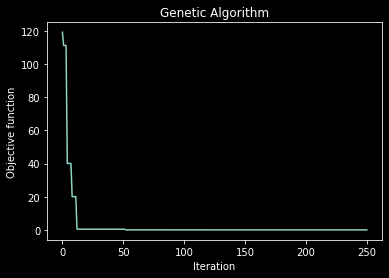

 The best solution found:                                                                           
 [0.0080 0.0216 -0.3335]

 Objective function:
 0.11175760215349254


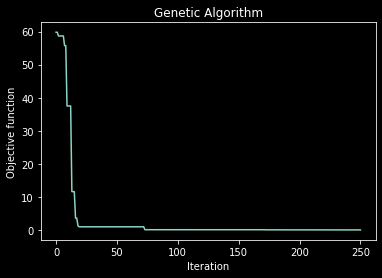

 The best solution found:                                                                           
 [-0.0038 0.0555 0.1361]

 Objective function:
 0.021604087347683043


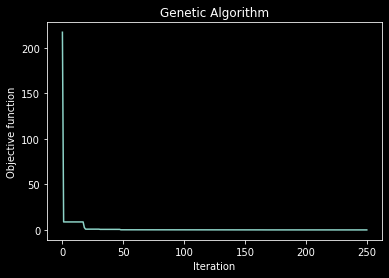

 The best solution found:                                                                           
 [0.0959 -0.0703 0.0105]

 Objective function:
 0.014246323380198062


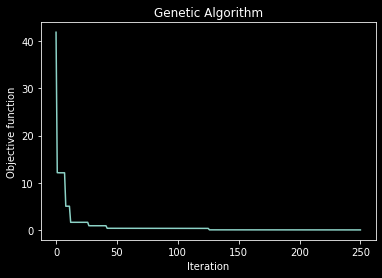

 The best solution found:                                                                           
 [0.0291 0.0410 0.1504]

 Objective function:
 0.02515902868782035


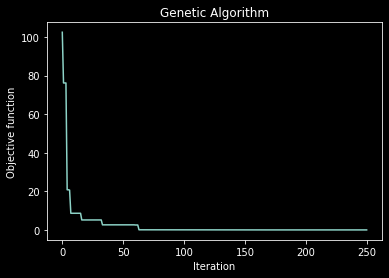

 The best solution found:                                                                           
 [0.0728 -0.0193 -0.1469]

 Objective function:
 0.027257825531123398


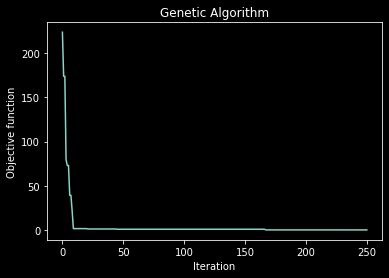

 The best solution found:                                                                           
 [-0.0137 -0.0788 -0.2777]

 Objective function:
 0.08348776989187945


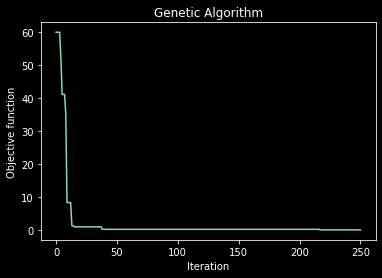

 The best solution found:                                                                           
 [0.1494 0.2491 0.0251]

 Objective function:
 0.08498095006650523


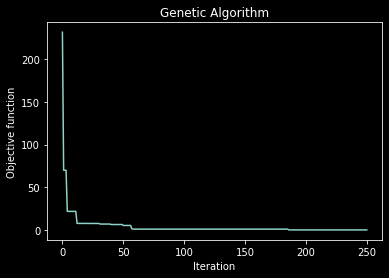

 The best solution found:                                                                           
 [-0.2812 0.1925 0.5064]

 Objective function:
 0.37252359771510757


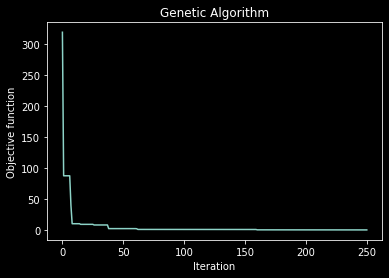

In [209]:
for i in range(10):
    varbound=np.array([(A, B), (A, B), (A, B)])
    algorithm_param = {'max_num_iteration': 250,\
                    'population_size':20,\
                    'mutation_probability':(i+1)/10,\
                    'elit_ratio': 0.01,\
                    'crossover_probability': 0.5,\
                    'parents_portion': 0.3,\
                    'crossover_type':'uniform',\
                    'max_iteration_without_improv':None}
    model=ga(function=xk_q01,dimension=3,variable_type='real', variable_boundaries=varbound,algorithm_parameters=algorithm_param)
    model.run()

Para a função de ackley com Algorítmo genético

 The best solution found:                                                                           
 [-0.1195 0.1018]

 Objective function:
 1.004790782041411


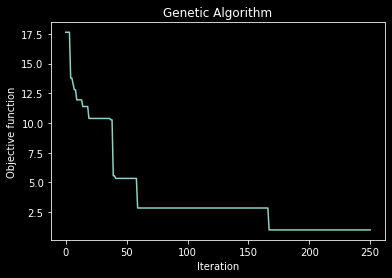

 The best solution found:                                                                           
 [0.1196 -0.0409]

 Objective function:
 0.7356282970011812


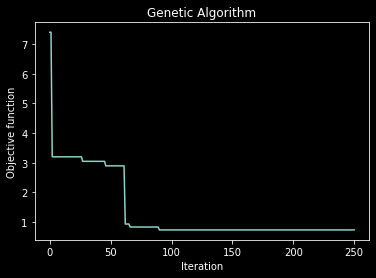

 The best solution found:                                                                           
 [-0.0001 0.0388]

 Objective function:
 0.149470109586602


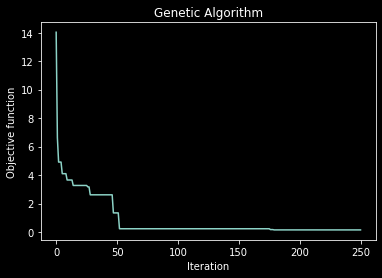

 The best solution found:                                                                           
 [0.0039 0.0787]

 Objective function:
 0.3800344335150747


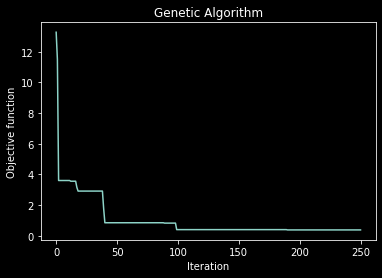

 The best solution found:                                                                           
 [-0.0011 -0.0107]

 Objective function:
 0.03341066847262297


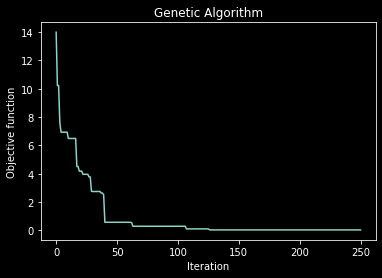

 The best solution found:                                                                           
 [0.0533 -0.0312]

 Objective function:
 0.2736018209726012


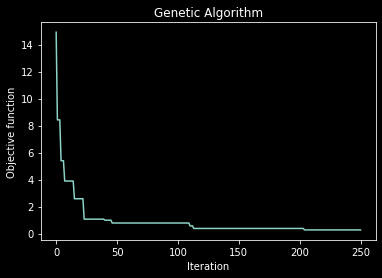

 The best solution found:                                                                           
 [-0.0040 0.0107]

 Objective function:
 0.03595776649559568


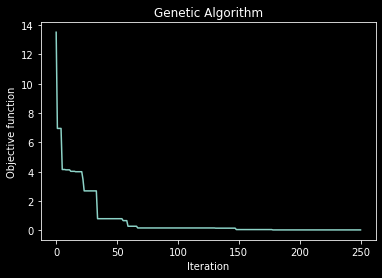

 The best solution found:                                                                           
 [-0.0002 -0.0030]

 Objective function:
 0.008787204197755472


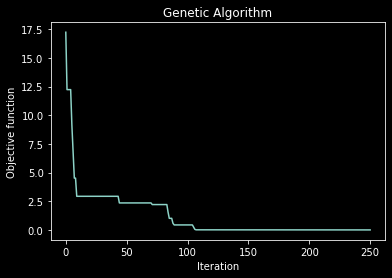

 The best solution found:                                                                           
 [-0.0308 -0.0042]

 Objective function:
 0.11364379871614361


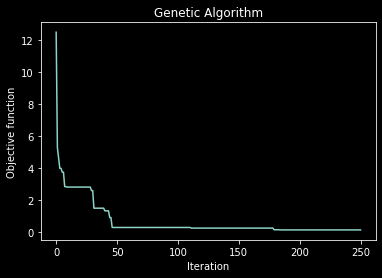

 The best solution found:                                                                           
 [0.0005 0.0027]

 Objective function:
 0.00794402019498719


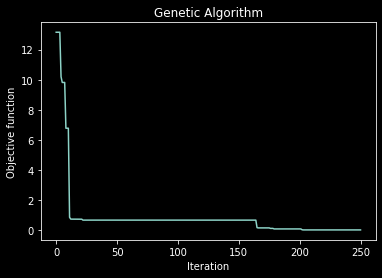

In [210]:
for i in range(10):

    varbound=np.array([(A, B), (A, B)])
    algorithm_param = {'max_num_iteration': 250,\
                    'population_size':20,\
                    'mutation_probability':(i+1)/10,\
                    'elit_ratio': 0.01,\
                    'crossover_probability': 0.5,\
                    'parents_portion': 0.3,\
                    'crossover_type':'uniform',\
                    'max_iteration_without_improv':None}
    model=ga(function=xk2_q01,dimension=2,variable_type='real', variable_boundaries=varbound,algorithm_parameters=algorithm_param)
    model.run()

**Questão 03**

Para a funçao de ackley, tem-se

In [211]:

%%time
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.3}
for i in range(10):
 optimizer = ps.single.GlobalBestPSO(n_particles=20, dimensions=2, options=options)
 a = optimizer
 cost, pos = optimizer.optimize(fx.ackley, iters=20)
 print (cost, pos)

2022-08-24 08:28:55,303 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.3}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=1.79
2022-08-24 08:28:55,342 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.7856372882794216, best pos: [0.2171 0.1143]
2022-08-24 08:28:55,354 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.3}


1.7856372882794216 [0.2171 0.1143]


pyswarms.single.global_best: 100%|██████████|20/20, best_cost=2.74
2022-08-24 08:28:55,392 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.7398646115335983, best pos: [0.9106 0.0696]
2022-08-24 08:28:55,402 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.3}


2.7398646115335983 [0.9106 0.0696]


pyswarms.single.global_best: 100%|██████████|20/20, best_cost=2.32
2022-08-24 08:28:55,442 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.3211877772966862, best pos: [0.1467 0.2737]
2022-08-24 08:28:55,453 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.3}


2.3211877772966862 [0.1467 0.2737]


pyswarms.single.global_best: 100%|██████████|20/20, best_cost=2.45
2022-08-24 08:28:55,492 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.4512530779129986, best pos: [0.2355 0.2184]
2022-08-24 08:28:55,502 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.3}


2.4512530779129986 [0.2355 0.2184]


pyswarms.single.global_best: 100%|██████████|20/20, best_cost=0.354
2022-08-24 08:28:55,537 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.3541726917585959, best pos: [0.0634 0.0395]


0.3541726917585959 [0.0634 0.0395]


2022-08-24 08:28:55,555 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.3}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=2.84
2022-08-24 08:28:55,593 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.8398860332921037, best pos: [0.1011 0.9518]
2022-08-24 08:28:55,608 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.3}


2.8398860332921037 [0.1011 0.9518]


pyswarms.single.global_best: 100%|██████████|20/20, best_cost=2.8
2022-08-24 08:28:55,648 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.803487682621516, best pos: [0.8851 0.0740]
2022-08-24 08:28:55,662 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.3}


2.803487682621516 [0.8851 0.0740]


pyswarms.single.global_best: 100%|██████████|20/20, best_cost=0.417
2022-08-24 08:28:55,701 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.4169382615497743, best pos: [0.0816 0.0209]
2022-08-24 08:28:55,714 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.3}


0.4169382615497743 [0.0816 0.0209]


pyswarms.single.global_best: 100%|██████████|20/20, best_cost=0.282
2022-08-24 08:28:55,754 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.28204123706509465, best pos: [0.0543 0.0322]
2022-08-24 08:28:55,766 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.3}


0.28204123706509465 [0.0543 0.0322]


pyswarms.single.global_best: 100%|██████████|20/20, best_cost=0.657
2022-08-24 08:28:55,803 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.656891901219073, best pos: [0.1168 -0.0042]


0.656891901219073 [0.1168 -0.0042]
CPU times: user 510 ms, sys: 199 ms, total: 709 ms
Wall time: 511 ms


Para a esfera com enxame de particulas, tem-se:

In [201]:
for i in range(10):
    optimizer = ps.single.LocalBestPSO(n_particles=20, dimensions=2, options=options)
    cost, pos = optimizer.optimize(fx.sphere, iters=1000)
    print (cost, pos)

2022-08-24 08:26:05,381 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}
pyswarms.single.local_best: 100%|██████████|1000/1000, best_cost=7.16e-46
2022-08-24 08:26:07,606 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 7.164539692168057e-46, best pos: [0.0000 -0.0000]
2022-08-24 08:26:07,618 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}


7.164539692168057e-46 [0.0000 -0.0000]


pyswarms.single.local_best: 100%|██████████|1000/1000, best_cost=1e-44  
2022-08-24 08:26:09,913 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 1.0047320866816661e-44, best pos: [0.0000 0.0000]
2022-08-24 08:26:09,924 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}


1.0047320866816661e-44 [0.0000 0.0000]


pyswarms.single.local_best: 100%|██████████|1000/1000, best_cost=4.38e-46
2022-08-24 08:26:12,173 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 4.380917032526571e-46, best pos: [0.0000 0.0000]
2022-08-24 08:26:12,184 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}


4.380917032526571e-46 [0.0000 0.0000]


pyswarms.single.local_best: 100%|██████████|1000/1000, best_cost=2.53e-43
2022-08-24 08:26:14,260 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 2.530288938912741e-43, best pos: [0.0000 0.0000]
2022-08-24 08:26:14,271 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}


2.530288938912741e-43 [0.0000 0.0000]


pyswarms.single.local_best: 100%|██████████|1000/1000, best_cost=5.39e-45
2022-08-24 08:26:16,467 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 5.3865456300860017e-45, best pos: [-0.0000 0.0000]
2022-08-24 08:26:16,478 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}


5.3865456300860017e-45 [-0.0000 0.0000]


pyswarms.single.local_best: 100%|██████████|1000/1000, best_cost=9.13e-48
2022-08-24 08:26:18,811 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 9.13494907708243e-48, best pos: [0.0000 -0.0000]
2022-08-24 08:26:18,822 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}


9.13494907708243e-48 [0.0000 -0.0000]


pyswarms.single.local_best: 100%|██████████|1000/1000, best_cost=1.38e-43
2022-08-24 08:26:21,042 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 1.381646348422172e-43, best pos: [0.0000 -0.0000]
2022-08-24 08:26:21,053 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}


1.381646348422172e-43 [0.0000 -0.0000]


pyswarms.single.local_best: 100%|██████████|1000/1000, best_cost=7.26e-44
2022-08-24 08:26:23,280 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 7.261499756808767e-44, best pos: [0.0000 0.0000]
2022-08-24 08:26:23,294 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}


7.261499756808767e-44 [0.0000 0.0000]


pyswarms.single.local_best: 100%|██████████|1000/1000, best_cost=5.99e-44
2022-08-24 08:26:25,676 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 5.987821989451555e-44, best pos: [-0.0000 0.0000]
2022-08-24 08:26:25,687 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}


5.987821989451555e-44 [-0.0000 0.0000]


pyswarms.single.local_best: 100%|██████████|1000/1000, best_cost=2.75e-46
2022-08-24 08:26:28,419 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 2.7486575573275498e-46, best pos: [-0.0000 -0.0000]


2.7486575573275498e-46 [-0.0000 -0.0000]


**Questão 04**

Percebe-se que a convergência para a esfera é facilitada pelo método do gradiente descendente, porém, para a função de ackley não se tem convergência para minimo global e isso varia para mínimos locais a depender da posição inicial de largada. Assim sendo, o método do enxame de particulas e algorítmo genético se mostrou mais eficaz, pois podem chegar ao mínimo global com relativa facilidade nesse intervalo de função